In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/fall22_hw/isye6414_group_project/ashish


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn')

### 1. get data and create artist level features

In [4]:
df_org = pd.read_csv("top_500_artists_deduplicate.csv")
df_org.shape

(4576, 15)

In [5]:
df_org.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'],
      dtype='object')

*Removing the 8 duplicates instances for now

In [6]:
arist_grp = df_org.groupby(["artist"]).agg({"popularity":["sum","count"]})
arist_grp.describe()

popularity            
               sum       count
count   729.000000  729.000000
mean    448.242798    6.277092
std     297.313613    4.089659
min      29.000000    1.000000
25%      80.000000    1.000000
50%     532.000000    8.000000
75%     678.000000   10.000000
max    2481.000000   37.000000

In [7]:
album_grp = df_org.groupby(["album"]).agg({"popularity":["sum","count"]})
album_grp.describe()

popularity             
               sum        count
count  2927.000000  2927.000000
mean    111.639563     1.563375
std      78.506337     1.058442
min      27.000000     1.000000
25%      68.000000     1.000000
50%      76.000000     1.000000
75%     139.000000     2.000000
max    1020.000000    11.000000

In [8]:
arist_grp = arist_grp.reset_index()
arist_grp.columns = ["artist","popularity_sum", "popularity_count"]

In [9]:
joined1 = df_org.merge(arist_grp,on=["artist"],how="left",suffixes=["_","_artist"])
joined1.shape

(4576, 17)

In [10]:
joined1.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'popularity_sum', 'popularity_count'],
      dtype='object')

In [11]:
album_grp = album_grp.reset_index()
album_grp.columns = ["album","popularity_sum", "popularity_count"]

In [12]:
joined2 = joined1.merge(album_grp,on=["album"],how="left",suffixes=["","_album"])
joined2.shape

(4576, 19)

In [13]:
joined2.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'popularity_sum', 'popularity_count', 'popularity_sum_album',
       'popularity_count_album'],
      dtype='object')

#### Create Artist and Album popularity agg variables

In [14]:
joined2["artist_avg_pop_other"]=(joined2["popularity_sum"]-joined2["popularity"])/\
(joined2["popularity_count"]-1)

joined2["album_avg_pop_other"]=(joined2["popularity_sum_album"]-joined2["popularity"])/\
(joined2["popularity_count_album"]-1)

In [15]:
joined2.isna().sum()

name                         0
album                        0
artist                       0
release_date                 0
length                       0
popularity                   0
danceability                 0
acousticness                 0
energy                       0
instrumentalness             0
liveness                     0
loudness                     0
speechiness                  0
tempo                        0
time_signature               0
popularity_sum               0
popularity_count             0
popularity_sum_album         0
popularity_count_album       0
artist_avg_pop_other       197
album_avg_pop_other       2001
dtype: int64

In [16]:
joined2[joined2.artist_avg_pop_other.isna()]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,loudness,speechiness,tempo,time_signature,popularity_sum,popularity_count,popularity_sum_album,popularity_count_album,artist_avg_pop_other,album_avg_pop_other
28,For My Hand (feat. Ed Sheeran),"Love, Damini",Burna Boy,2022-07-07,159123,84,0.870,0.161000,0.479,0.000157,...,-7.779,0.1650,104.059,4,84,1,84,1,NaN,NaN
37,Lost in the Fire (feat. The Weeknd),Hyperion,Gesaffelstein,2019-03-08,202093,85,0.658,0.093300,0.671,0.000927,...,-12.210,0.0363,100.966,4,85,1,85,1,NaN,NaN
221,THE SCOTTS,THE SCOTTS,THE SCOTTS,2020-04-24,165977,78,0.716,0.233000,0.537,0.000000,...,-7.648,0.0514,129.979,4,78,1,78,1,NaN,NaN
279,family ties (with Kendrick Lamar),The Melodic Blue,Baby Keem,2021-09-10,252262,79,0.711,0.005880,0.611,0.000000,...,-5.453,0.3300,134.093,4,79,1,79,1,NaN,NaN
312,Turn On The Lights again.. (feat. Future),USB,Fred again..,2022-01-18,267946,69,0.683,0.012500,0.887,0.446000,...,-4.944,0.0497,132.007,4,69,1,69,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,Waiting On The Sky To Change,Waiting On The Sky To Change,STARSET,2022-08-19,244135,68,0.369,0.000055,0.933,0.000000,...,-4.441,0.1170,168.059,4,68,1,68,1,NaN,NaN
4522,SKRR,MVP,KALIM,2020-09-24,119039,60,0.803,0.163000,0.649,0.000027,...,-6.599,0.1320,125.038,4,60,1,60,1,NaN,NaN
4524,Fendi Drip,MILLIES,Luciano,2019-08-29,220880,60,0.827,0.082700,0.646,0.000000,...,-6.122,0.5050,168.025,4,60,1,60,1,NaN,NaN
4525,Hier,Hier,Lucio101,2022-05-27,151500,59,0.729,0.151000,0.621,0.862000,...,-9.651,0.1090,76.459,4,59,1,59,1,NaN,NaN


### Transform Dates

In [17]:
joined2["release_date"] = pd.to_datetime(joined2["release_date"])

In [18]:
joined2[["release_date"]].describe()

<ipython-input-18-dc12befdfa01>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  joined2[["release_date"]].describe()


,release_date
count,4576
unique,1504
top,2013-01-01 00:00:00
freq,38
first,1956-03-01 00:00:00
last,2022-10-14 00:00:00


In [19]:
joined2["release_date"].max(),joined2["release_date"].min()

(Timestamp('2022-10-14 00:00:00'), Timestamp('1956-03-01 00:00:00'))

In [20]:
joined2["days_since"] = joined2["release_date"].max() - joined2["release_date"]

In [21]:
joined2[["days_since"]].describe()

,days_since
count,4576
mean,3658 days 03:42:28.951049024
std,4688 days 18:24:49.289123264
min,0 days 00:00:00
25%,553 days 00:00:00
50%,1767 days 00:00:00
75%,4669 days 00:00:00
max,24333 days 00:00:00


### Pre Process for model
1. Remove only 1 song artists
2. Impute Artist Popularity

In [22]:
mask_single_song_artist = joined2.artist_avg_pop_other.isna()
df_model = joined2[~mask_single_song_artist]
df_model.isna().sum()

name                         0
album                        0
artist                       0
release_date                 0
length                       0
popularity                   0
danceability                 0
acousticness                 0
energy                       0
instrumentalness             0
liveness                     0
loudness                     0
speechiness                  0
tempo                        0
time_signature               0
popularity_sum               0
popularity_count             0
popularity_sum_album         0
popularity_count_album       0
artist_avg_pop_other         0
album_avg_pop_other       1804
days_since                   0
dtype: int64

In [23]:
df_model.shape

(4379, 22)

In [24]:
df_model["days_since"] = df_model["days_since"].dt.days

<ipython-input-24-f788fd6bd6fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["days_since"] = df_model["days_since"].dt.days


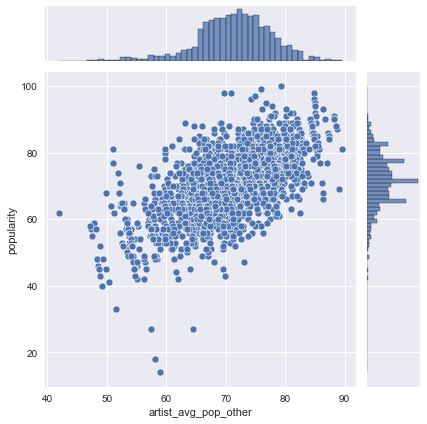

In [25]:
sns.jointplot(data=df_model, x="artist_avg_pop_other", y="popularity")

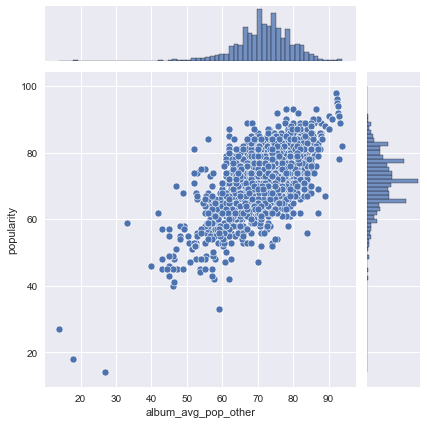

In [26]:
sns.jointplot(data=df_model, x="album_avg_pop_other", y="popularity")

In [27]:
mask_missing_album_popularity = df_model["album_avg_pop_other"].isna()
df_model["imputed_album_avg_pop_other"] = mask_missing_album_popularity.astype("int")

<ipython-input-27-61c47b3f99f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["imputed_album_avg_pop_other"] = mask_missing_album_popularity.astype("int")


In [28]:
df_model["album_avg_pop_other"][mask_missing_album_popularity] = df_model["artist_avg_pop_other"][mask_missing_album_popularity]

<ipython-input-28-c6002eeb7d97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["album_avg_pop_other"][mask_missing_album_popularity] = df_model["artist_avg_pop_other"][mask_missing_album_popularity]
/Users/ashish1610dhiman/opt/anaconda3/envs/spotify_app/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


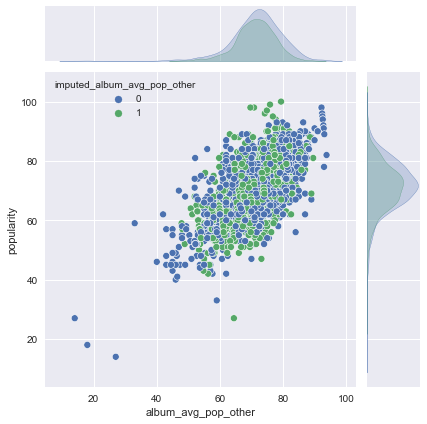

In [29]:
sns.jointplot(data=df_model, x="album_avg_pop_other", y="popularity", hue="imputed_album_avg_pop_other")

In [30]:
numeric_cols = list(df_model.select_dtypes(include=np.number).columns)
numeric_cols

['length',
 'popularity',
 'danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'time_signature',
 'popularity_sum',
 'popularity_count',
 'popularity_sum_album',
 'popularity_count_album',
 'artist_avg_pop_other',
 'album_avg_pop_other',
 'days_since',
 'imputed_album_avg_pop_other']

### Regression Model

In [31]:
X_cols = numeric_cols[0:1]+numeric_cols[2:]
Y_cols = numeric_cols[1]

In [32]:
### Subset X and Y
X = df_model[X_cols]
y = df_model[Y_cols]

### Scale the data
# scaler = MinMaxScaler()
# X_scaled[X_cols] = scaler.fit_transform(X)

In [33]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.rsquared

0.581076060168243

In [34]:
X

,const,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,popularity_sum,popularity_count,popularity_sum_album,popularity_count_album,artist_avg_pop_other,album_avg_pop_other,days_since,imputed_album_avg_pop_other
0,1.0,218364,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4,1214,15,91,1,80.214286,80.214286,119,1
1,1.0,189893,0.463,0.314000,0.642,0.000000,0.0686,-4.474,0.3400,83.389,4,554,7,246,3,77.333333,78.000000,168,0
2,1.0,173986,0.792,0.007760,0.625,0.001800,0.3290,-5.609,0.0536,103.967,4,1214,15,86,1,80.571429,80.571429,2352,1
3,1.0,242965,0.849,0.063500,0.424,0.000000,0.0834,-9.579,0.3240,145.887,4,1214,15,541,7,80.642857,76.000000,406,0
4,1.0,198973,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4,1214,15,85,1,80.642857,80.642857,1568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4570,1.0,220160,0.765,0.423000,0.500,0.000000,0.1080,-7.626,0.1520,107.043,4,530,8,203,3,66.714286,70.000000,1904,0
4571,1.0,143152,0.784,0.159000,0.586,0.000000,0.1830,-5.148,0.0570,113.973,4,530,8,122,2,66.857143,60.000000,798,0
4572,1.0,196386,0.724,0.141000,0.600,0.000218,0.1040,-4.391,0.2900,86.984,4,2481,37,132,2,67.222222,71.000000,1400,0
4573,1.0,197855,0.868,0.292000,0.616,0.000000,0.2530,-5.405,0.1700,98.017,4,530,8,122,2,67.142857,62.000000,798,0


In [35]:
def _get_r_sq(X,y):
    model = sm.OLS(y, X)
    results = model.fit()
    return (results.rsquared)

def get_left_right(X,y,threshold):
    mask_left = X["days_since"] <= threshold
    X_left = X.loc[mask_left]
    y_left = y.loc[mask_left]
    X_right = X.loc[~mask_left]
    y_right = y.loc[~mask_left]
    return (_get_r_sq(X_left,y_left),_get_r_sq(X_right,y_right),sum(mask_left))

In [36]:
X1 = X[list(X.columns[:11]) + ["days_since"]]

In [37]:
result_dict = {
    threshold:get_left_right(X1,y,threshold)\
    for threshold in np.linspace(30,1000,200).astype(int)
}

In [38]:
result_df = pd.DataFrame.from_dict(result_dict,orient="index")
result_df.columns = ["r_sq(days since<=threshold)","r_sq(days since > threshold)","count_days_since_lt_threshold"]

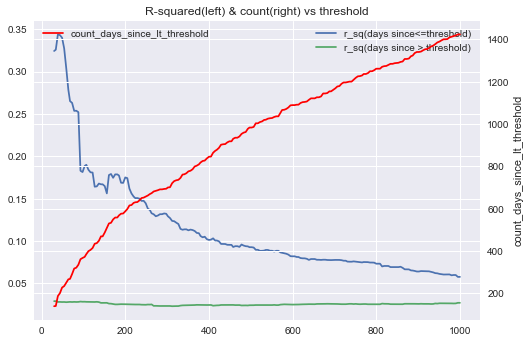

In [39]:
result_df[["r_sq(days since<=threshold)","r_sq(days since > threshold)"]].plot()
ax2 = plt.twinx()
sns.lineplot(data=result_df["count_days_since_lt_threshold"], color="r",\
             label="count_days_since_lt_threshold", ax=ax2)
plt.title("R-squared(left) & count(right) vs threshold")
plt.legend()

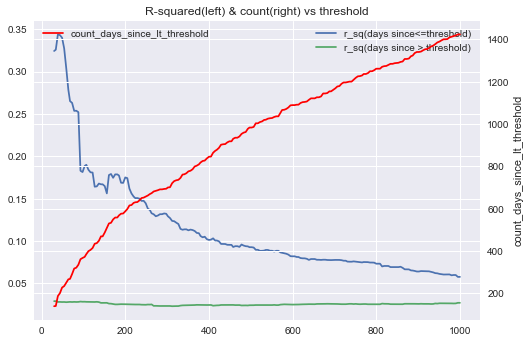

In [40]:
result_dict1 = {
    threshold:get_left_right(X,y,threshold)\
    for threshold in np.linspace(30,1000,200).astype(int)
}

result_df1 = pd.DataFrame.from_dict(result_dict,orient="index")
result_df1.columns = ["r_sq(days since<=threshold)","r_sq(days since > threshold)","count_days_since_lt_threshold"]

result_df1[["r_sq(days since<=threshold)","r_sq(days since > threshold)"]].plot()
ax2 = plt.twinx()
sns.lineplot(data=result_df1["count_days_since_lt_threshold"], color="r",\
             label="count_days_since_lt_threshold", ax=ax2)
plt.title("R-squared(left) & count(right) vs threshold")
plt.legend()